# Stock prediction project  
   
## Contents      

&nbsp;&nbsp;&nbsp;**[1. Aims and objectives](#1.-Aims-and-objectives)**   
&nbsp;&nbsp;&nbsp;**[2. Literature review](#2.-Literature-review)**   
&nbsp;&nbsp;&nbsp;**[3. Method](#3.-Method)**   
&nbsp;&nbsp;&nbsp;**[4. Result](#4.-Result)**   
&nbsp;&nbsp;&nbsp;**[5. Discussion and conclusion](#5.-Discussion-and-conclusion)**   
&nbsp;&nbsp;&nbsp;**[6. Reference](#6.-Reference)**   



<br/>
!! Outputs which include images had been removed since github page returns an error when showing a large size file.

## 1. Aims and objectives   
   
<br/>
This project focuses on predicting 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')  
    
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/samsung_stock_historical_data.csv' 
#print(type(df))
#df.head()

df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True) # index_col: Column(s) to use as the row labels of the DataFrame
ts = df['Close']
#df.head()
ts.head()

Date
2019-08-14    43700.0
2019-08-16    43900.0
2019-08-19    43600.0
2019-08-20    44450.0
2019-08-21    44500.0
Name: Close, dtype: float64

In [3]:
# Dealing with the null data
ts = ts.interpolate(method='time')
ts[ts.isna()]

Series([], Name: Close, dtype: float64)

In [4]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  
    rolstd = timeseries.rolling(window=window).std()    

    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    

In [5]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 10 

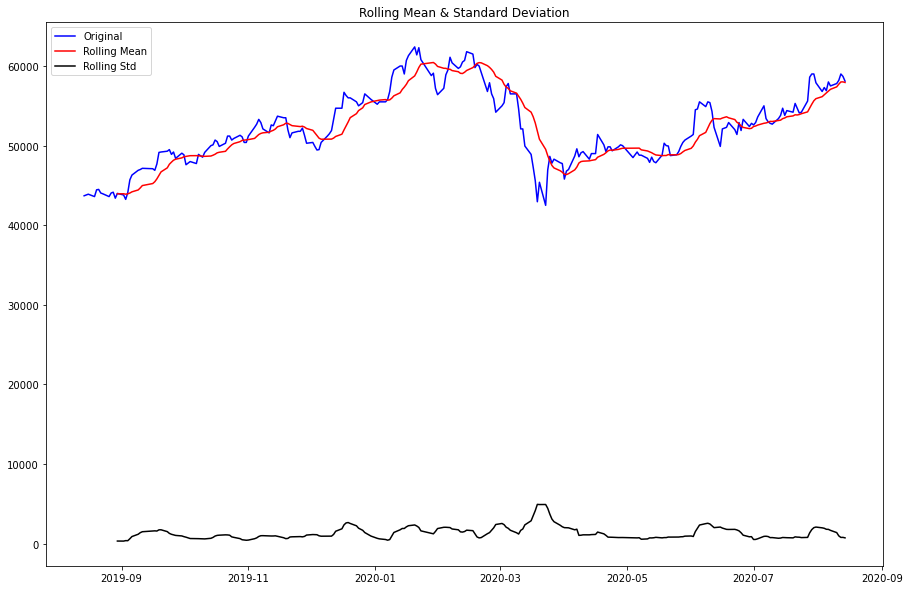

In [6]:
plot_rolling_statistics(ts, window=12)

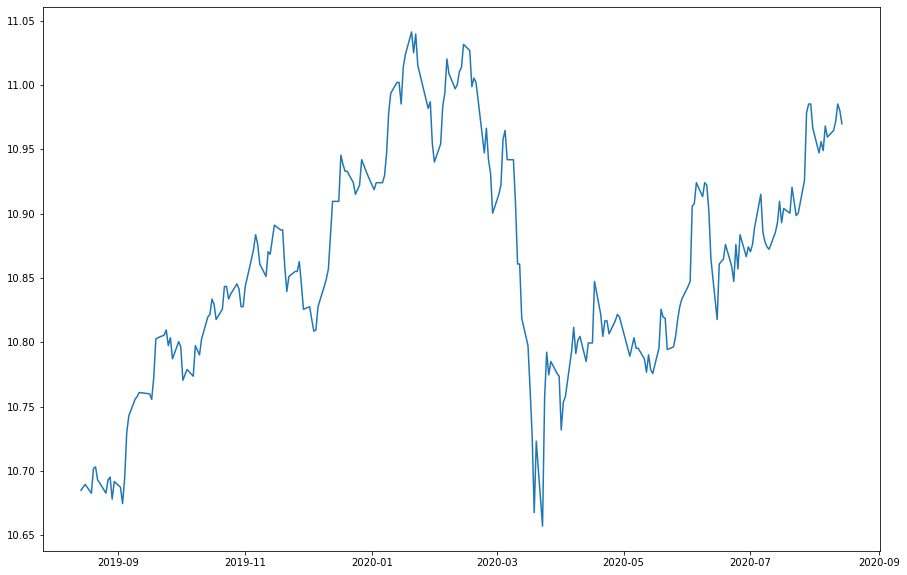

In [7]:
ts_log = np.log(ts) # converting to log function to deal with the variance varying over the time peride.
plt.plot(ts_log)

In [8]:
augmented_dickey_fuller_test(ts_log) # p-value : 0.14

Results of Dickey-Fuller Test:
Test Statistic                  -2.396408
p-value                          0.142753
#Lags Used                       2.000000
Number of Observations Used    246.000000
Critical Value (1%)             -3.457215
Critical Value (5%)             -2.873362
Critical Value (10%)            -2.573070
dtype: float64


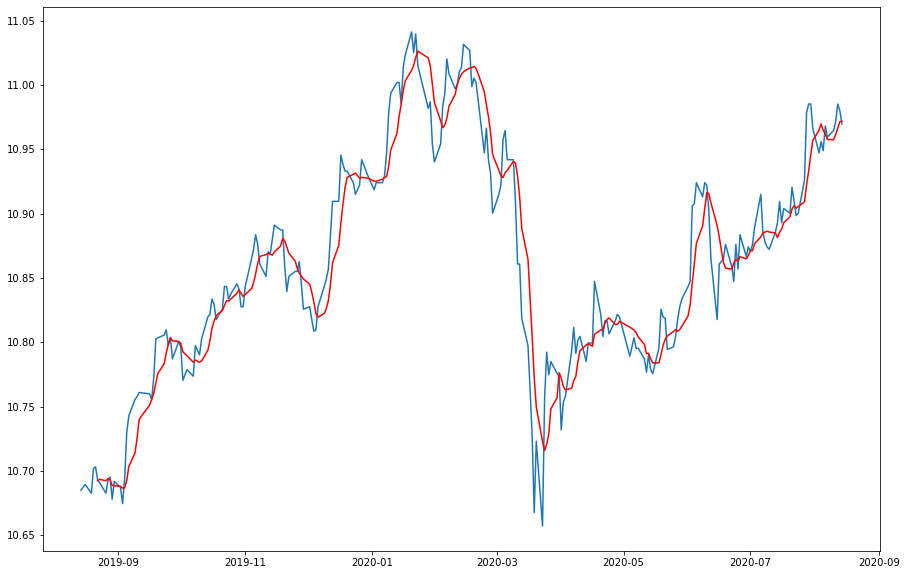

In [9]:
moving_avg = ts_log.rolling(window=6).mean()  
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [10]:
ts_log_moving_avg = ts_log - moving_avg # this removes the trend
ts_log_moving_avg.head(15)

Date
2019-08-14         NaN
2019-08-16         NaN
2019-08-19         NaN
2019-08-20         NaN
2019-08-21         NaN
2019-08-22    0.000409
2019-08-23   -0.002815
2019-08-26   -0.009667
2019-08-27   -0.001110
2019-08-28    0.002286
2019-08-29   -0.010676
2019-08-30    0.003243
2019-09-02   -0.000743
2019-09-03   -0.012036
2019-09-04    0.007238
Name: Close, dtype: float64

In [11]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Date
2019-08-22    0.000409
2019-08-23   -0.002815
2019-08-26   -0.009667
2019-08-27   -0.001110
2019-08-28    0.002286
2019-08-29   -0.010676
2019-08-30    0.003243
2019-09-02   -0.000743
2019-09-03   -0.012036
2019-09-04    0.007238
2019-09-05    0.037125
2019-09-06    0.039389
2019-09-09    0.041626
2019-09-10    0.032004
2019-09-11    0.020801
Name: Close, dtype: float64

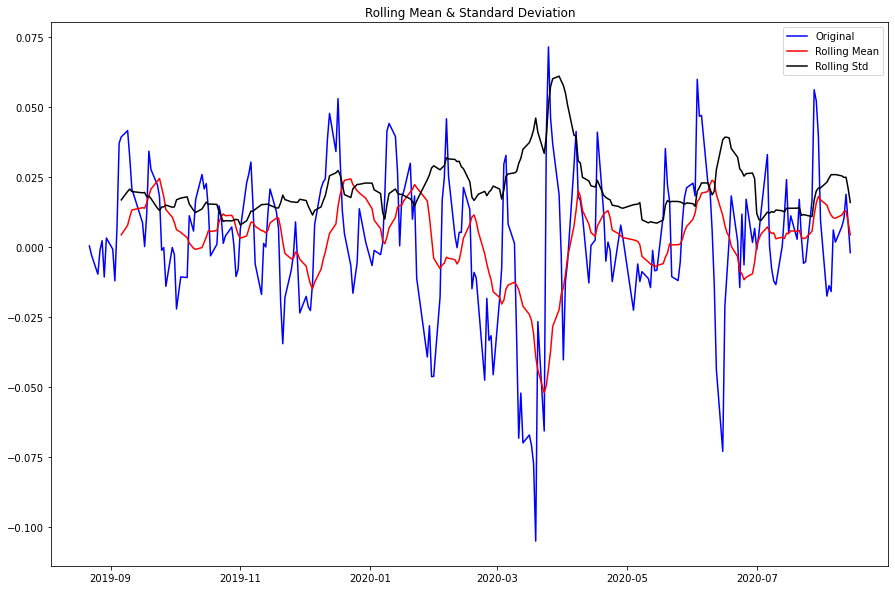

In [12]:
plot_rolling_statistics(ts_log_moving_avg)

In [13]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                -7.420820e+00
p-value                        6.743935e-11
#Lags Used                     2.000000e+00
Number of Observations Used    2.410000e+02
Critical Value (1%)           -3.457779e+00
Critical Value (5%)           -2.873609e+00
Critical Value (10%)          -2.573202e+00
dtype: float64


p-value : 0.000015 when window = 12   
          5.62e-07 when window = 5   
          6.744e-11 when window = 6   

Time series decomposition: easy way!   
----   



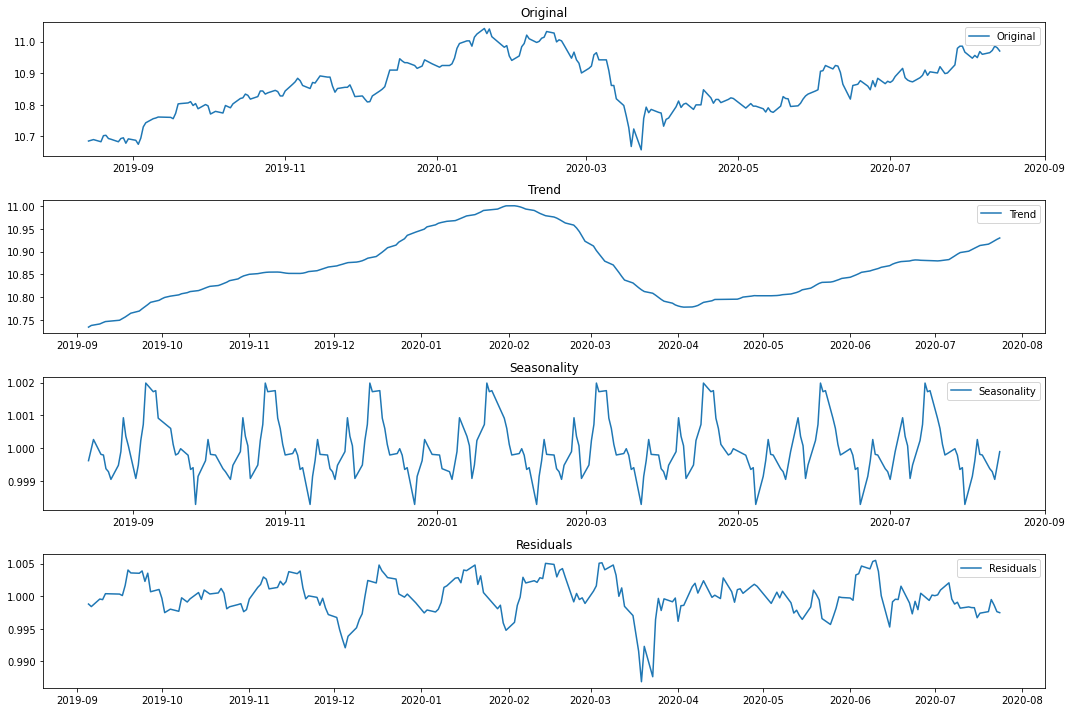

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.title('Original')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.title('Trend')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.title('Seasonality')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.title('Residuals') # Residual : Original - Trend - Seasonality
plt.tight_layout()

In [15]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -5.776182e+00
p-value                        5.253002e-07
#Lags Used                     3.000000e+00
Number of Observations Used    2.150000e+02
Critical Value (1%)           -3.461136e+00
Critical Value (5%)           -2.875079e+00
Critical Value (10%)          -2.573986e+00
dtype: float64


P value : 5.1e-07

Partition the dataset    
----   


(224,)
(25,)


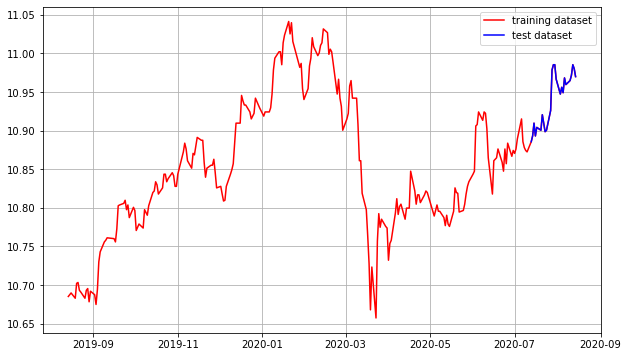

In [16]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()
print(train_data.shape)
print(test_data.shape)

train_data : test_data = 9 : 1

Seek appropriate ARIMA parameters   
----   


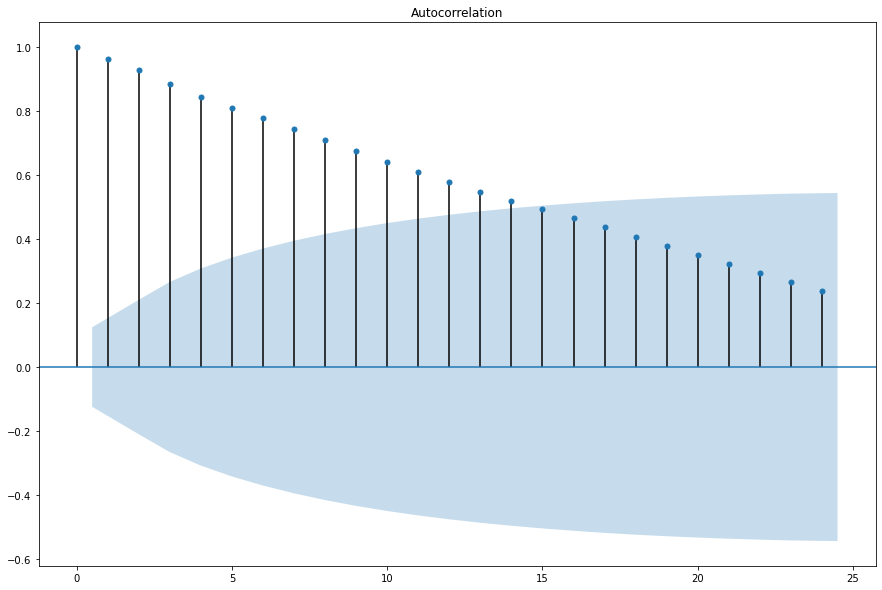

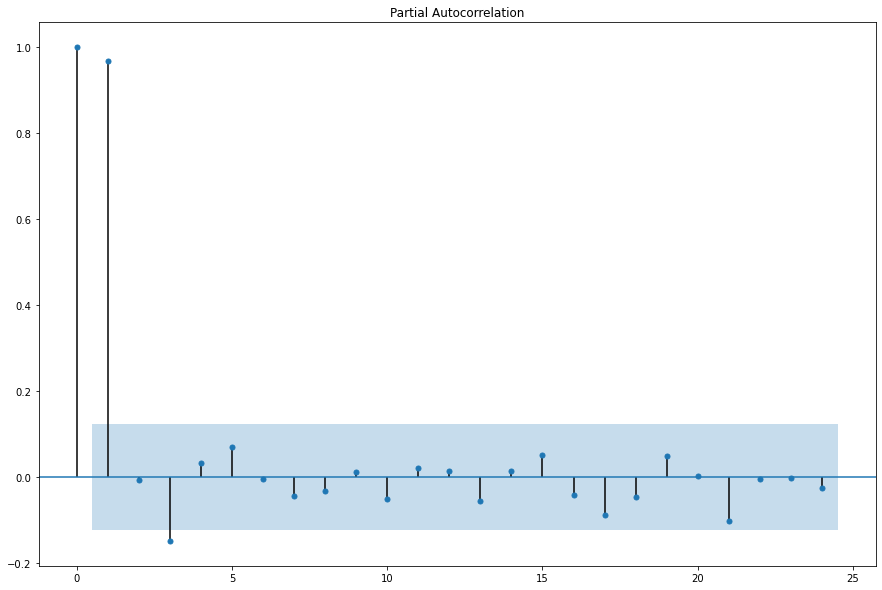

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -9.677808e+00
p-value                        1.227357e-16
#Lags Used                     1.000000e+00
Number of Observations Used    2.460000e+02
Critical Value (1%)           -3.457215e+00
Critical Value (5%)           -2.873362e+00
Critical Value (10%)          -2.573070e+00
dtype: float64


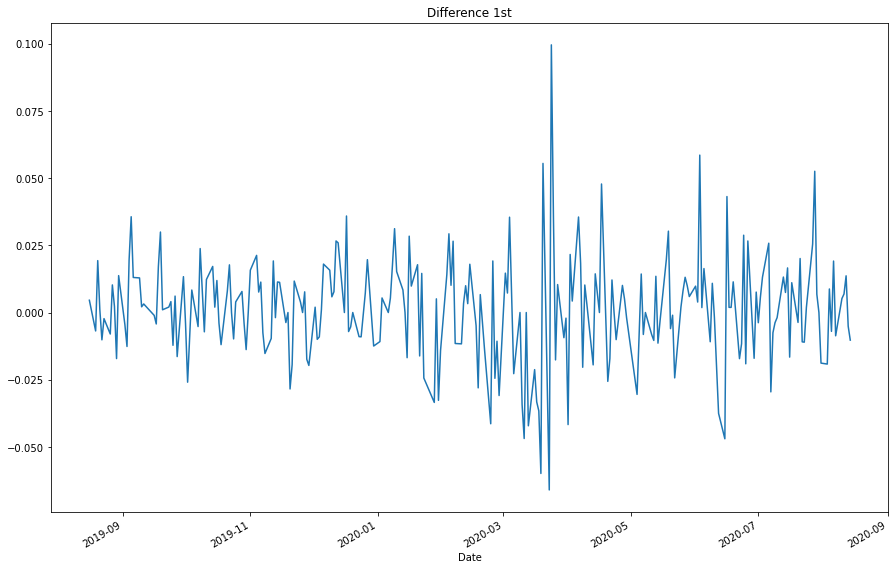

In [18]:
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -7.956640e+00
p-value                        3.024917e-12
#Lags Used                     1.400000e+01
Number of Observations Used    2.320000e+02
Critical Value (1%)           -3.458855e+00
Critical Value (5%)           -2.874080e+00
Critical Value (10%)          -2.573453e+00
dtype: float64


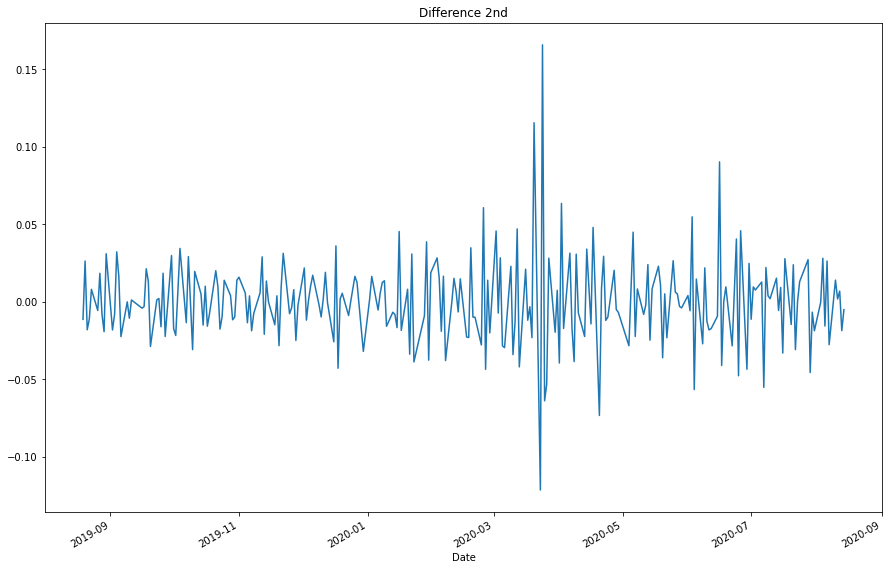

In [19]:
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

Train ARIMA model   
----   

In [42]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  223
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 554.555
Method:                       css-mle   S.D. of innovations              0.020
Date:                Tue, 18 Aug 2020   AIC                          -1103.111
Time:                        10:29:51   BIC                          -1092.889
Sample:                             1   HQIC                         -1098.984
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0008      0.001      0.645      0.519      -0.002       0.003
ar.L1.D.Close    -0.0348      0.067     -0.520      0.603      -0.166       0.096
                                    Root

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


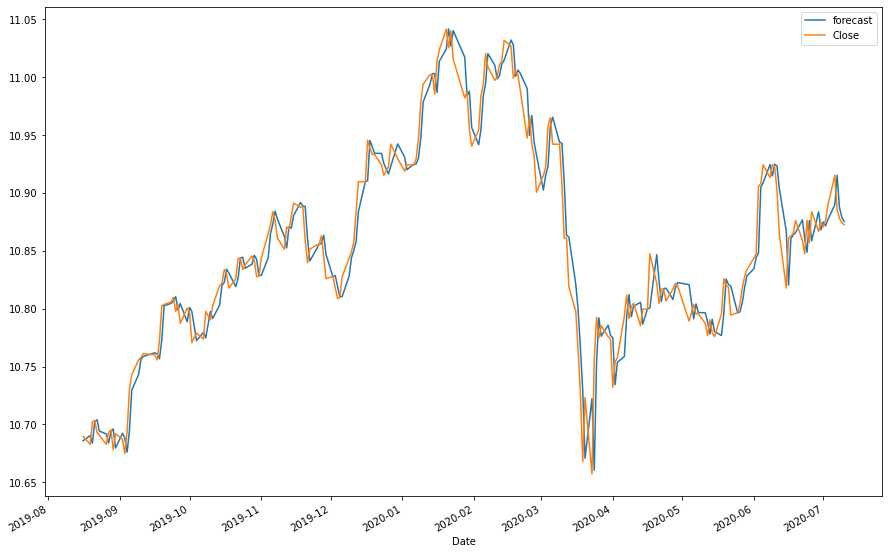

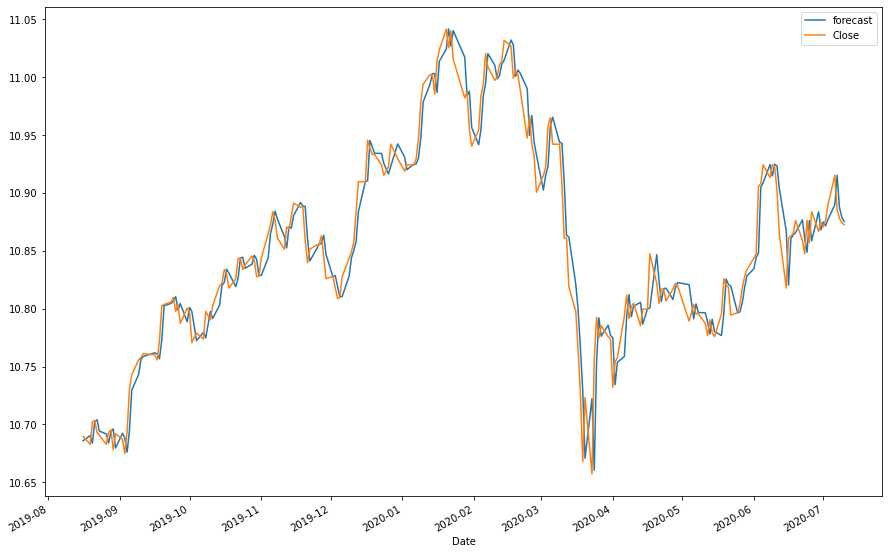

In [43]:
fitted_m.plot_predict()

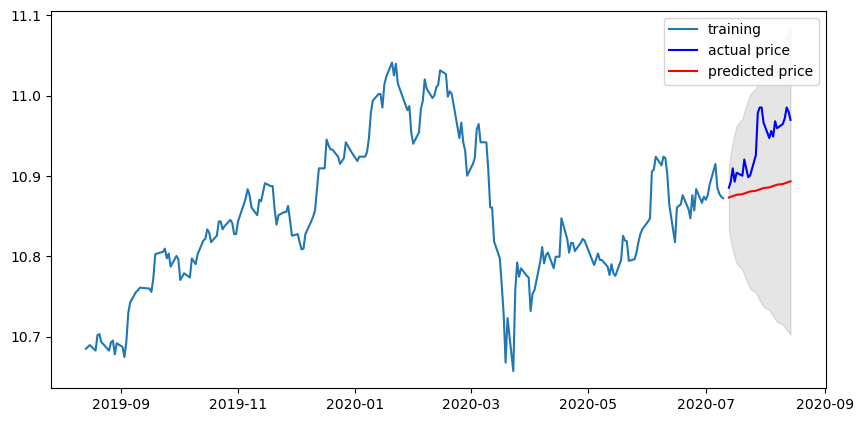

In [45]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  12796890.958670614
MAE:  3155.7548803577333
RMSE:  3577.2742358771734
MAPE: 5.49%
